## Fake News Classifier
Dataset : https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

>Feature extraction consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning.

>CountVectorizer (bag of words) - Creates a word vector and counts the number of times a word from vector is present in file.

In [2]:
df = pd.read_csv("fake-news/train.csv") #df - data frame

In [3]:
df.head()  #the .head() returns n-rows of data from table(by default 5) 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


NOTE: Label is the output. We should get rid of it and take the individual features. 

In [4]:
X = df.drop('label',axis=1) #removing column-label

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
#assigining the "label" column to a variable 'y'
y = df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape #20,800 rows and 5 columns upon dropping one column.

(20800, 5)

In [9]:
df.tail() # .tail() will give the last 5 columns of the dataset 

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [10]:
df = df.dropna() #drops the NaN values resulting in uneven indexing. 

In [11]:
messages = df.copy()

In [12]:
df.head(10) # Records - 6 and 8 will be missing because of dropping. 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
messages.reset_index(inplace=True) #reordering the index numbers.

inplace = True when modification is done to original df.

inplace = False when we make a copy of that df and make changes in that copy. 

In [14]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages['text'][7]

'A week before Michael T. Flynn resigned as national security adviser, a sealed proposal was   to his office, outlining a way for President Trump to lift sanctions against Russia. Mr. Flynn is gone, having been caught lying about his own discussion of sanctions with the Russian ambassador. But the proposal, a peace plan for Ukraine and Russia, remains, along with those pushing it: Michael D. Cohen, the president’s personal lawyer, who delivered the document Felix H. Sater, a business associate who helped Mr. Trump scout deals in Russia and a Ukrainian lawmaker trying to rise in a political opposition movement shaped in part by Mr. Trump’s former campaign manager Paul Manafort. At a time when Mr. Trump’s ties to Russia, and the people connected to him, are under heightened scrutiny  —   with investigations by American intelligence agencies, the F. B. I. and Congress  —   some of his associates remain willing and eager to wade into   efforts behind the scenes. Mr. Trump has confounded De

In [16]:
import nltk

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rsk13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import re

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #WordNetLemmatizer will also work
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-z-A-Z]', ' ' , messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = " ".join(review)
    corpus.append(review) # corpus contains all the words except stopwords.

The above cell takes time to run because it has to go through a lot of records. 

NLTK - Natural Language Toolkit

Stemming is finding the root word. 

In [20]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu - breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video - breitbart',
 'beno hamon win french socialist parti presidenti nomin - new york time',
 'back-channel plan ukrain russia courtesi trump associ - new york time',
 'obama organ action partner soros-link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success - new york time',
 'well fargo chief abruptli step - new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fb

Below shows the comparison between corpus and messages.

In [21]:
print(messages['title'][3])
print(messages.shape) #18285 rows and 6 columns because label has not been removed from messages.
print(corpus[3]) 

15 Civilians Killed In Single US Airstrike Have Been Identified
(18285, 6)
civilian kill singl us airstrik identifi


In [22]:
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

>max_features = CountVectorizer will choose the words/features that occur most frequently.

>An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’.        

>ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features. The default ngram_range is (1,1).

In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
X.shape

(18285, 5000)

In [25]:
y = messages['label']

In [26]:
from sklearn.model_selection import train_test_split #splitting of data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [27]:
cv.get_feature_names()[:10] #according to ngram range

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [28]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names()) #without giving columns, it will just display number.

In [29]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


NOTE: 
absolute is present in the 5th line(4+1) in the X_train and not in the messages or corpus because it got split. 

>0 - word is not present

>1 - word is present


## Plotting Confusion Matrix

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()                       #shows the colour intensity of different colours with respect to values in a box.
    tick_marks = np.arange(len(classes)) #creating from [0 to len(classes)-1]
    plt.xticks(tick_marks, classes, rotation=20)
    plt.yticks(tick_marks, classes, rotation=10)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### "To find accuracy, we define three methods - Multinomial Naive Bayes Algorithm, Passive Agressive Classifier Algorithm and Logistic Regression"

## 1.Multinomial Naive Bayes Algorithm

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [32]:
import numpy as np
from sklearn import metrics
import itertools

Accuracy = 0.9012427506213753
5439
Confusion matrix, without normalization


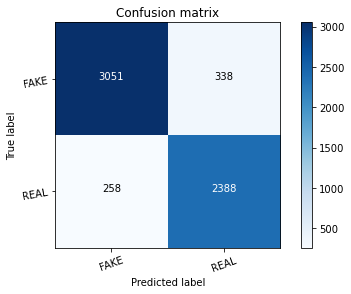

In [33]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test) # given a trained model, predict the label of a new set of data.
                                  #This method accepts one argument, and returns the learned label for each object in the array.

score = metrics.accuracy_score(y_test,pred) # gives %
score1 = metrics.accuracy_score(y_test,pred,normalize = False) #return the number of correctly classified samples
print("Accuracy = " + str(score) + "\n" + str(score1))
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

In [34]:
y_train.shape

(12250,)

In [35]:
X_train.shape

(12250, 5000)

In [36]:
X_test.shape

(6035, 5000)

In [37]:
y_test.shape

(6035,)

## 2.Passive Agressive Classifier Algorithm

Passive Agressive Classifier Algorithm is generally used for large number of data/dataset. Example - Twitter's tweet analysis.

max_iter is the number of iterations happening. Default value is 1000. Changing the value will give us various accuracies. Low max_iter will result in completion of the iterations before the convergence. 

When the model “converges” there is usually no significant error decrease / performance increase anymore. ( Unless a more modern optimizer is applied)

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy = 0.9212924606462303
5560
Confusion matrix, without normalization


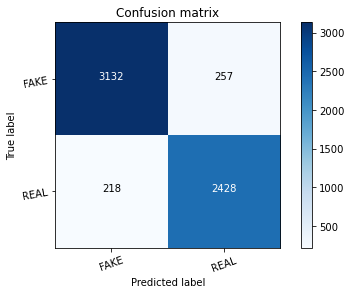

In [39]:
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test) # given a trained model, predict the label of a new set of data.
                                  #This method accepts one argument, and returns the learned label for each object in the array.

score = metrics.accuracy_score(y_test,pred) # gives %
score1 = metrics.accuracy_score(y_test,pred,normalize = False) #return the number of correctly classified samples
print("Accuracy = " + str(score) + "\n" + str(score1))
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

## 3. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

Accuracy = 0.9337199668599834
5635
Confusion matrix, without normalization


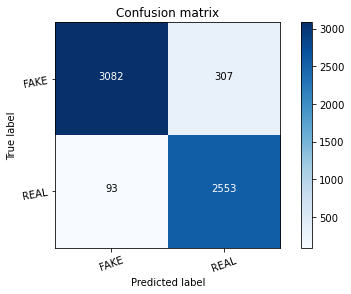

In [41]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test) # given a trained model, predict the label of a new set of data.
                                  #This method accepts one argument, and returns the learned label for each object in the array.

score = metrics.accuracy_score(y_test,pred) # gives %
score1 = metrics.accuracy_score(y_test,pred,normalize = False) #return the number of correctly classified samples
print("Accuracy = " + str(score) + "\n" + str(score1))
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

### Logistic Regression gives higher accuracy upon comparsion with Multinomial NB and Passive-Agressive

### For flask application, Fake_news (for flask).ipynb has been used. 